In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# importing data
com_df = pd.read_csv('Company_Data.csv')
com_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
# Changing nominal data to  numeric data
label_encoder = preprocessing.LabelEncoder()
com_df['ShelveLoc'] = label_encoder.fit_transform(com_df['ShelveLoc'])
com_df['Urban'] = label_encoder.fit_transform(com_df['Urban'])
com_df['US'] =label_encoder.fit_transform(com_df['US'])
com_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [4]:
#changing Sales variable to categorical from continous
category = pd.cut(com_df['Sales'],bins=[0,5.39,9.32,17],labels=['low','moderate','high'])
com_df.insert(0,'Sales_Group',category)

com_df.drop(['Sales'],axis = 1, inplace = True)
com_df

,Sales_Group,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,0,42,17,1,1
1,high,111,48,16,260,83,1,65,10,1,1
2,high,113,35,10,269,80,2,59,12,1,1
3,moderate,117,100,4,466,97,2,55,14,1,1
4,low,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,1,33,14,1,1
396,moderate,139,23,3,37,120,2,55,11,0,1
397,moderate,162,26,12,368,159,2,40,18,1,1
398,moderate,100,79,7,284,95,0,50,12,1,1


In [5]:
com_df.dropna(inplace=True)
com_df.shape

(399, 11)

In [6]:
#Splitting the data
x = com_df.iloc[:, 1:]
y = com_df.iloc[:, 0]

In [7]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [8]:
y

0          high
1          high
2          high
3      moderate
4           low
         ...   
395        high
396    moderate
397    moderate
398    moderate
399        high
Name: Sales_Group, Length: 399, dtype: category
Categories (3, object): ['low' < 'moderate' < 'high']

In [9]:
# Splitting data into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)

### Building Decision tree Classifer using Entropy Criteria

In [10]:
model = DecisionTreeClassifier( criterion='entropy', max_depth=15)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15)

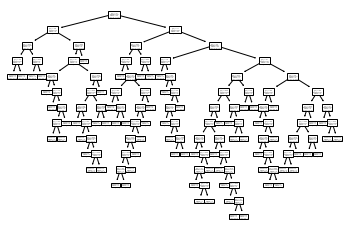

In [11]:
tree.plot_tree(model);

In [12]:
# Predicting on test
preds = model.predict(x_test)
pd.Series(preds).value_counts()

moderate    40
low         24
high        16
dtype: int64

In [13]:
preds

array(['moderate', 'moderate', 'moderate', 'low', 'moderate', 'high',
       'moderate', 'moderate', 'low', 'moderate', 'moderate', 'low',
       'moderate', 'moderate', 'moderate', 'moderate', 'moderate', 'low',
       'high', 'high', 'high', 'moderate', 'moderate', 'low', 'moderate',
       'high', 'low', 'moderate', 'low', 'moderate', 'low', 'moderate',
       'high', 'moderate', 'high', 'moderate', 'high', 'low', 'low',
       'low', 'high', 'low', 'moderate', 'moderate', 'high', 'low',
       'high', 'moderate', 'moderate', 'moderate', 'low', 'high',
       'moderate', 'low', 'low', 'high', 'low', 'moderate', 'moderate',
       'low', 'high', 'low', 'low', 'moderate', 'low', 'moderate',
       'moderate', 'moderate', 'low', 'high', 'moderate', 'low',
       'moderate', 'moderate', 'moderate', 'low', 'moderate', 'moderate',
       'moderate', 'high'], dtype=object)

In [14]:
pd.crosstab(y_test,preds)

col_0,high,low,moderate
Sales_Group,,,
low,0,13,10
moderate,6,9,24
high,10,2,6


In [15]:
# Accuracy
np.mean(preds==y_test)

0.5875

### Building Decision Tree Classifier (CART) using Gini Criteria

In [16]:
model_g = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [17]:
model_g.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [18]:
# Prediction and computing the accuracy
pred_g = model_g.predict(x_test)
pd.crosstab(y_test,pred_g)

col_0,high,low,moderate
Sales_Group,,,
low,0,7,16
moderate,7,4,28
high,11,0,7


In [19]:
# Accuracy
np.mean(pred_g==y_test)

0.575